#### 📦 1 | Configuration
---

**1.1 | Install required packages**

In [1]:
# Install required packages
!pip install notion-client >/dev/null

**1.2 | Import required packages**

In [2]:
# Import required packages
from    notion_client import Client
import  pandas as pd
from    plotnine import *
from    google.colab import files
import  os

**1.3 | Upload config file containing Notion API token**

In [3]:
uploaded = files.upload()

Saving config.txt to config.txt


**1.4 | Extract the Notion API token value from the config file**

In [4]:
# Specify the file name (e.g., 'config.txt')
file_name = 'config.txt'

# Read the file and set the environment variable
with open(file_name, 'r') as file:
    for line in file:
        key, value = line.strip().split('=')
        if key == 'NOTION_API_TOKEN':
            os.environ[key] = value

# Assign Notion API token to variable
notion_api_token = os.environ['NOTION_API_TOKEN']

#### 🔧 2 | Parameters
---

In [5]:
# Define the database ID in Notion
database_id = "1592a60c499680598369dfa2aec198b1"

#### 🚰 3 | Import Data
---

**3.1 | Create Notion Client**

In [6]:
# Create the Notion Client
notion = Client(auth=notion_api_token)

**3.2 | Import table data from Notion**

In [7]:
# Query the database
response = notion.databases.query(database_id=database_id)

# Extract the results from the response
results = response['results']

# Convert the list of results into a pandas DataFrame
df_biomarkers_raw = pd.DataFrame(results)

# Print the raw response to see its structure
df_biomarkers_raw.head(5)

,object,id,created_time,last_edited_time,created_by,last_edited_by,cover,icon,parent,archived,in_trash,properties,url,public_url
0,page,9dcee02b-7f8d-4486-921f-f7c578ce42e3,2025-01-11T09:48:00.000Z,2025-01-11T12:19:00.000Z,"{'object': 'user', 'id': 'bb6ea58a-00cd-472f-b...","{'object': 'user', 'id': 'bf979852-d96d-47fd-b...",None,"{'type': 'emoji', 'emoji': '🇺🇸'}","{'type': 'database_id', 'database_id': '1592a6...",False,False,"{'Link': {'id': '%3FRTT', 'type': 'rich_text',...",https://www.notion.so/High-Throughput-Measurem...,https://crunchme.notion.site/High-Throughput-M...
1,page,5d5873c1-a5bf-4235-8102-a53b472027b5,2025-01-11T09:47:00.000Z,2025-01-12T03:23:00.000Z,"{'object': 'user', 'id': 'bb6ea58a-00cd-472f-b...","{'object': 'user', 'id': 'bb6ea58a-00cd-472f-b...",None,"{'type': 'emoji', 'emoji': '🇺🇸'}","{'type': 'database_id', 'database_id': '1592a6...",False,False,"{'Link': {'id': '%3FRTT', 'type': 'rich_text',...",https://www.notion.so/CD8-T-cells-5d5873c1a5bf...,https://crunchme.notion.site/CD8-T-cells-5d587...
2,page,1df74c6f-b9a8-41b7-aa02-c1557f0f7a61,2025-01-11T09:43:00.000Z,2025-01-12T03:23:00.000Z,"{'object': 'user', 'id': 'bb6ea58a-00cd-472f-b...","{'object': 'user', 'id': 'bb6ea58a-00cd-472f-b...",None,"{'type': 'emoji', 'emoji': '🇩🇪'}","{'type': 'database_id', 'database_id': '1592a6...",False,False,"{'Link': {'id': '%3FRTT', 'type': 'rich_text',...",https://www.notion.so/Cell-deformability-1df74...,https://crunchme.notion.site/Cell-deformabilit...
3,page,642de498-ff35-433d-b0d6-296007f59b89,2025-01-11T09:41:00.000Z,2025-01-12T03:23:00.000Z,"{'object': 'user', 'id': 'bb6ea58a-00cd-472f-b...","{'object': 'user', 'id': 'bb6ea58a-00cd-472f-b...",None,"{'type': 'emoji', 'emoji': '🇩🇪'}","{'type': 'database_id', 'database_id': '1592a6...",False,False,"{'Link': {'id': '%3FRTT', 'type': 'rich_text',...",https://www.notion.so/BioSig-PEM-642de498ff354...,https://crunchme.notion.site/BioSig-PEM-642de4...
4,page,5d9fcb98-3af3-4176-9758-93b9c7b26cf8,2025-01-11T09:40:00.000Z,2025-01-12T03:23:00.000Z,"{'object': 'user', 'id': 'bb6ea58a-00cd-472f-b...","{'object': 'user', 'id': 'bb6ea58a-00cd-472f-b...",None,"{'type': 'emoji', 'emoji': '🇩🇪'}","{'type': 'database_id', 'database_id': '1592a6...",False,False,"{'Link': {'id': '%3FRTT', 'type': 'rich_text',...",https://www.notion.so/VADYS-ME-5d9fcb983af3417...,https://crunchme.notion.site/VADYS-ME-5d9fcb98...


#### 🧹 4 | Tidying Data
---

**4.1 | Define helper function for handling each type of property in Notion database**

In [8]:
# Property: Title
def get_title_value(property_obj):
    """Extract the plain text from a 'title' property."""
    title_list = property_obj.get("title", [])
    return title_list[0]["plain_text"] if title_list else ""

# Property: Text
def get_rich_text_value(property_obj):
    """Extract the plain text from a 'rich_text' property."""
    rich_list = property_obj.get("rich_text", [])
    return rich_list[0]["plain_text"] if rich_list else ""

# Property: Name
def get_select_value(property_obj):
    """Extract the 'name' from a 'select' property."""
    select_obj = property_obj.get("select", {})
    return select_obj.get("name", "")

# Property: Multi-Select
def get_multi_select_value(property_obj):
    """Extract all 'name' values from a 'multi_select' property as a comma-separated string."""
    ms_list = property_obj.get("multi_select", [])
    return ", ".join([item["name"] for item in ms_list])

# Property: Number
def get_number_value(property_obj):
    """Extract the numeric value from a 'number' property (e.g., a year)."""
    return property_obj.get("number", None)

# Property: URL
def get_url_value(property_obj):
    """Extract the URL string from a 'url' property."""
    return property_obj.get("url", "")

**4.2 | Parse rows for each of the columns in the Notion database**

In [9]:
# Create empty list object
parsed_rows = []

# For loop to move through each original column
for page in results:
    props = page["properties"]

    # Create a dictionary for this row
    row_data = {}

    # Project (title property)
    row_data["Project"] = get_title_value(props["Project"])

    # Status (select)
    row_data["Status"] = get_rich_text_value(props["Status"])

    # Disease (multi_select)
    row_data["Disease"] = get_multi_select_value(props["Disease"])

    # Year (number)
    row_data["Year"] = get_number_value(props["Year"])

    # Institution (rich_text)
    row_data["Institution"] = get_rich_text_value(props["Institution"])

    # Link (url)
    row_data["Link"] = get_rich_text_value(props["Link"])

    # Method (rich_text)
    row_data["Method"] = get_rich_text_value(props["Method"])

    # Key People (rich_text)
    row_data["Key People"] = get_rich_text_value(props["Key People"])

    # Country (select)
    row_data["Country"] = get_select_value(props["Country"])

    # Add this row dict to our list
    parsed_rows.append(row_data)

# Convert to dataframe
df_biomarkers = pd.DataFrame(parsed_rows)

# Convert 'Year' column to integer, handling potential errors
df_biomarkers['Year'] = pd.to_numeric(df_biomarkers['Year'], errors='coerce').astype('Int64')

# Check results
df_biomarkers

,Project,Status,Disease,Year,Institution,Link,Method,Key People,Country
0,High-Throughput Measurements of Persistent SAR...,Ongoing,Long Covid,2024,UCSF,https://recovercovid.org/pathobiology,,Dr Michael Peluso,United States
1,CD8 T cells,Ongoing,Long Covid,<NA>,Polybio,https://polybio.org/projects/long-covid-using-...,,Prof E. John Wherry,United States
2,Cell deformability,Ongoing,ME/CFS,2024,Charite,https://cfc.charite.de/en/other_research/cell_...,,Prof Jochen Guck,Germany
3,BioSig-PEM,Ongoing,ME/CFS,2024,University Hospital Jena,https://www-gesundheitsforschung--bmbf-de.tran...,,Prof Christian Puta,Germany
4,VADYS-ME,Ongoing,ME/CFS,2024,Charité,https://www-gesundheitsforschung--bmbf-de.tran...,,Dr Wolfram Döhner,Germany
5,Inflammatory biomarkers,Ongoing,Long Covid,2024,UMCG,https://projecten-zonmw-nl.translate.goog/nl/p...,,Prof AH Mailand-van der Zee,Netherlands
6,Autoantibody diagnostic test,Ongoing,Long Covid,2024,UMC Utrecht,https://projecten-zonmw-nl.translate.goog/nl/p...,Autoantibodies,Niels Eijkelkamp,Netherlands
7,MuscleME,Ongoing,ME/CFS,2023,Amsterdam UMC,https://projecten.zonmw.nl/en/project/explaini...,,Dr Rob Wüst,Netherlands
8,Spike assay,"Preliminary, needs validation",Long Covid,2023,Brigham and Women's Hospital,https://pubmed.ncbi.nlm.nih.gov/36052466/,Spike in blood,Prof David Walt,United States
9,Clearing the fog,Ongoing,Long Covid,2024,WEHI,,,Dr Marcel Doerflinger,Australia


#### 📊 5 | Visualisation
---

##### 5.1 | Biomarker Project Count by Country

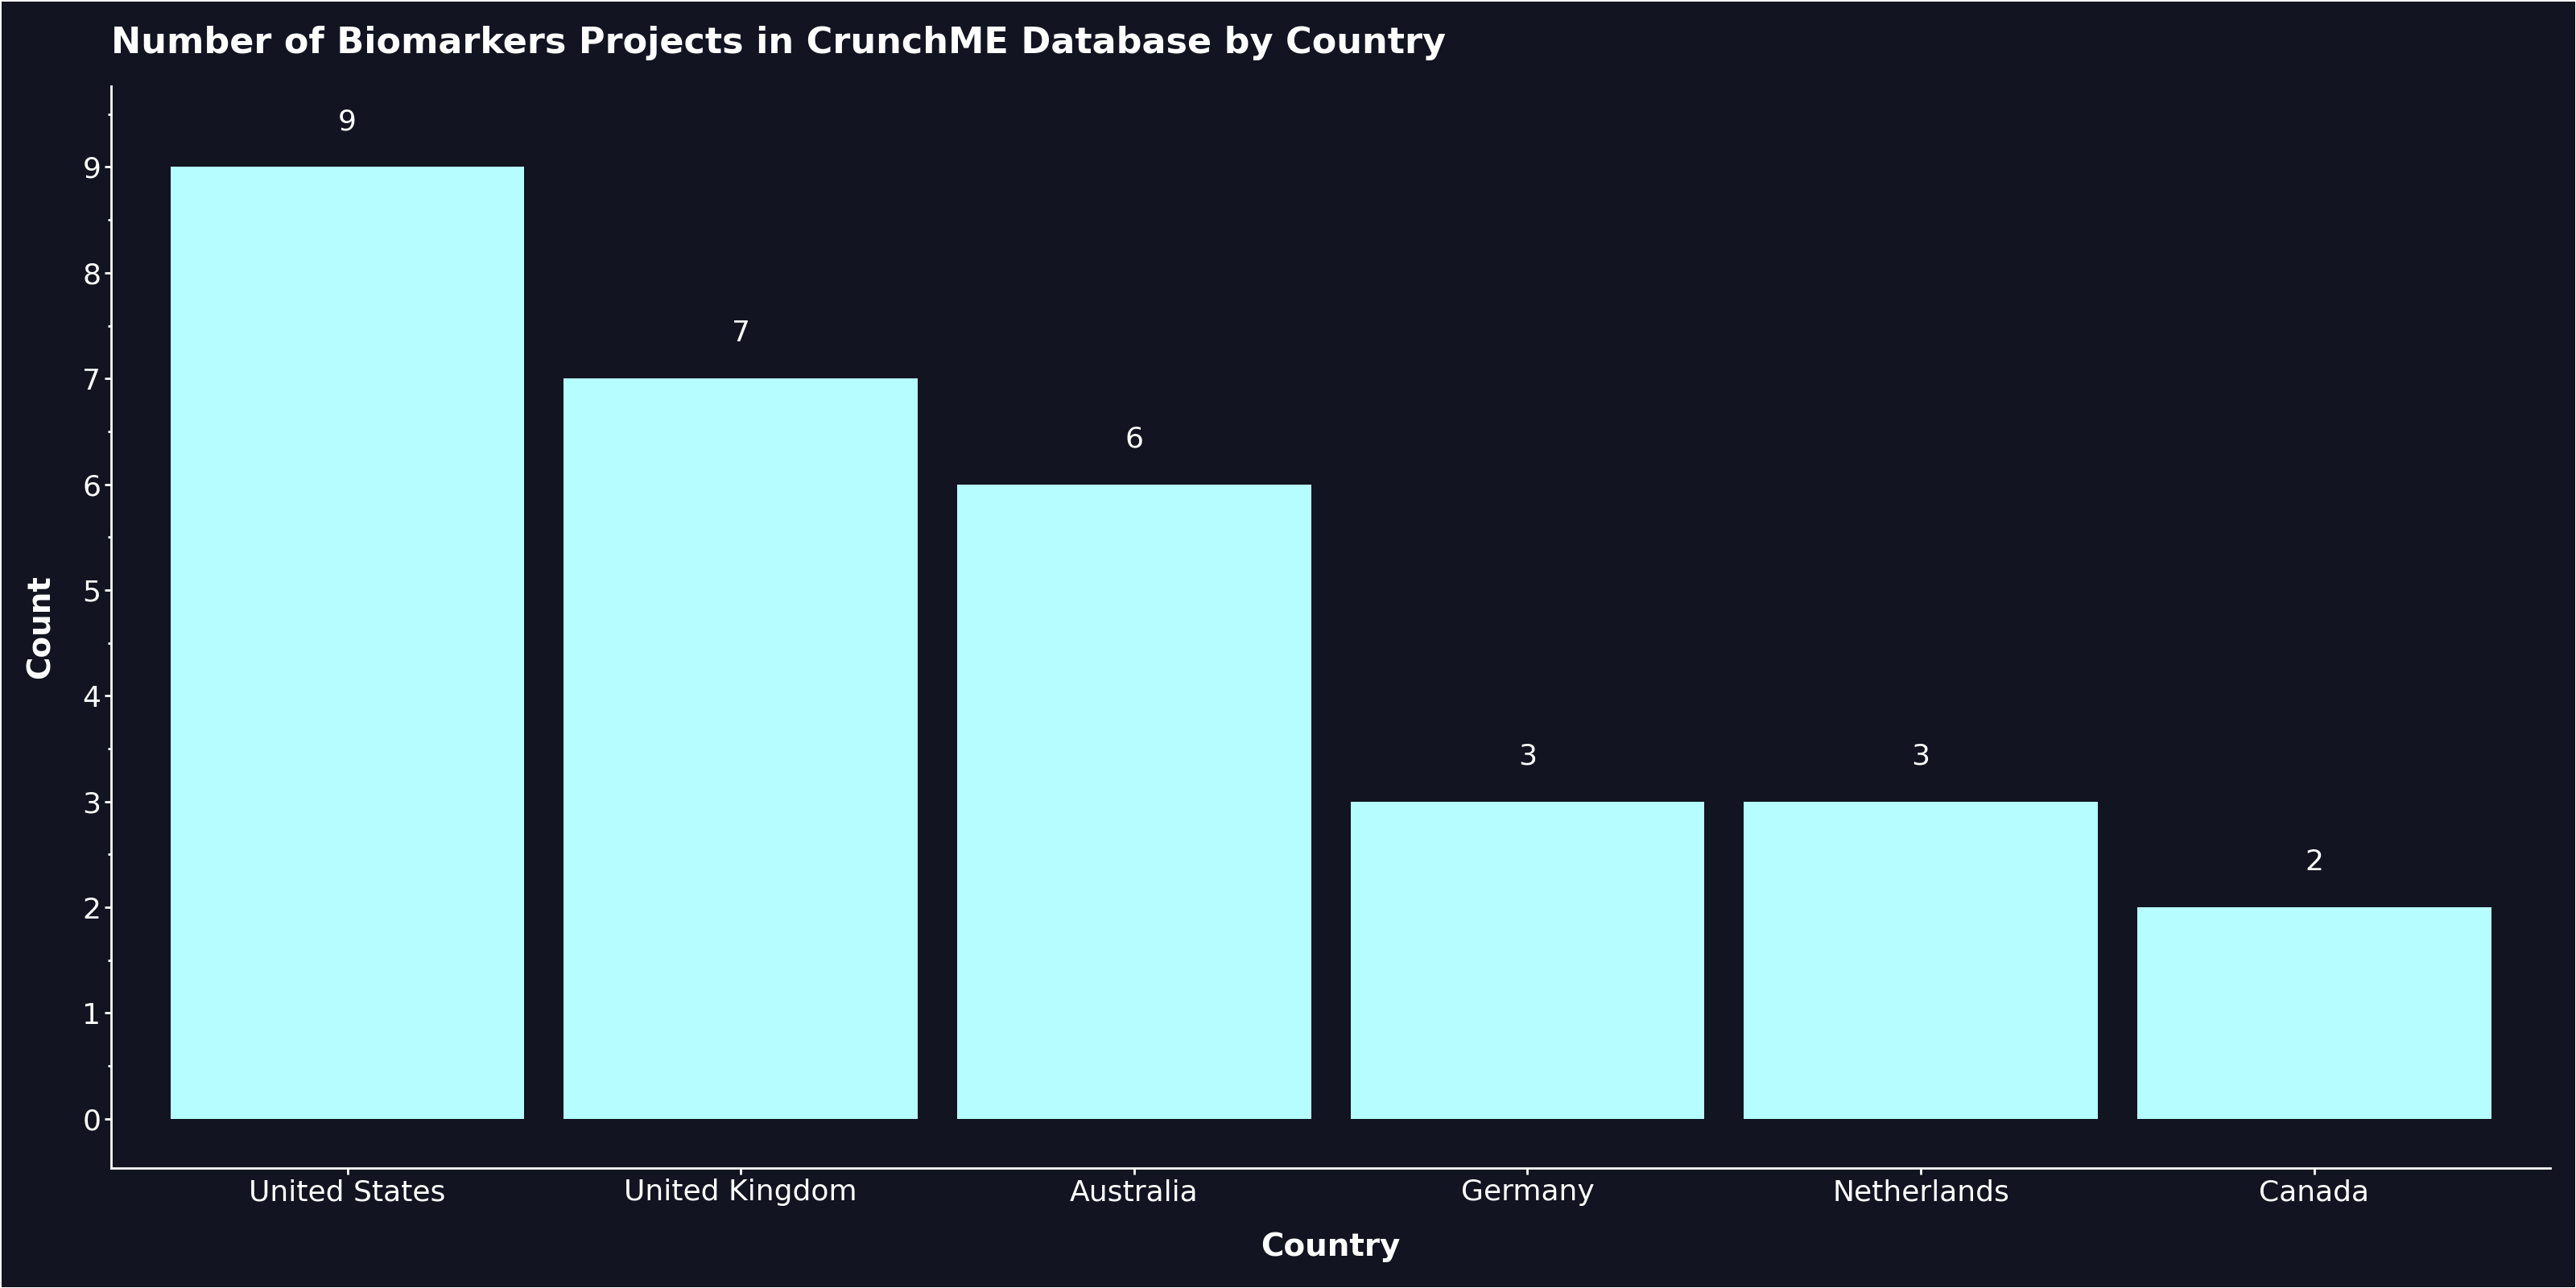

In [10]:
# Count occurrences of each country
country_counts = df_biomarkers['Country'].value_counts()

# Create list of country counts
sorted_countries = country_counts.index.tolist()

# Order Country by count
df_biomarkers['Country'] = pd.Categorical(
    df_biomarkers['Country'],
    categories=sorted_countries,
    ordered=True
)

# Create the bar chart
country_plot = (
    ggplot(df_biomarkers, aes(x='Country'))
    + geom_bar(fill='#B6FDFF')
    + geom_text(aes(label='..count..'), stat='count', va='bottom', size=13, color='white', nudge_y=0.3)
    + labs(title='Number of Biomarkers Projects in CrunchME Database by Country', x='Country', y='Count')
    + theme_classic()
    + theme(
        figure_size=(16, 8),
        axis_title=element_text(size=14, weight='bold', color='white'),
        axis_text=element_text(size=13, color='white'),
        plot_title=element_text(size=16, weight='bold', color='white', hjust=0),
        legend_title=element_text(size=16, weight='bold', color='white'),
        legend_text=element_text(size=16, color='white'),
        plot_background=element_rect(fill='#121421', color=None),
        panel_background=element_rect(fill='#121421', color=None),
        legend_background=element_rect(fill='#121421', color=None),
        legend_key=element_rect(fill='#121421', color=None),
        axis_line=element_line(color='white', size=1),
        axis_ticks=element_line(color='white', size=1),
        legend_position='none'
    )
    + scale_y_continuous(breaks=range(0, df_biomarkers['Country'].value_counts().max() + 1))
)

# Render plot
country_plot

##### 5.2 | Biomarker Projects by Year

In [11]:
# Count occurrences of each year
year_counts = df_biomarkers['Year'].value_counts()

# Generate a full range of years from the earliest to the latest
min_year, max_year = df_biomarkers['Year'].min(), df_biomarkers['Year'].max()
full_years = range(min_year, max_year + 1)

# Create a DataFrame to ensure all years are present
df_full_years = pd.DataFrame({'Year': list(full_years)})

# Merge the DataFrame to include all years, even with zero counts
df_plot_years = df_full_years.merge(
    df_biomarkers['Year'].value_counts().reset_index(),
    left_on='Year',
    right_on='Year',
    how='left'
).fillna(0)

# Rename columns for clarity
df_plot_years.columns = ['Year', 'Count']

# Check results
df_plot_years.head(5)

,Year,Count
0,2013,1
1,2014,0
2,2015,0
3,2016,0
4,2017,0


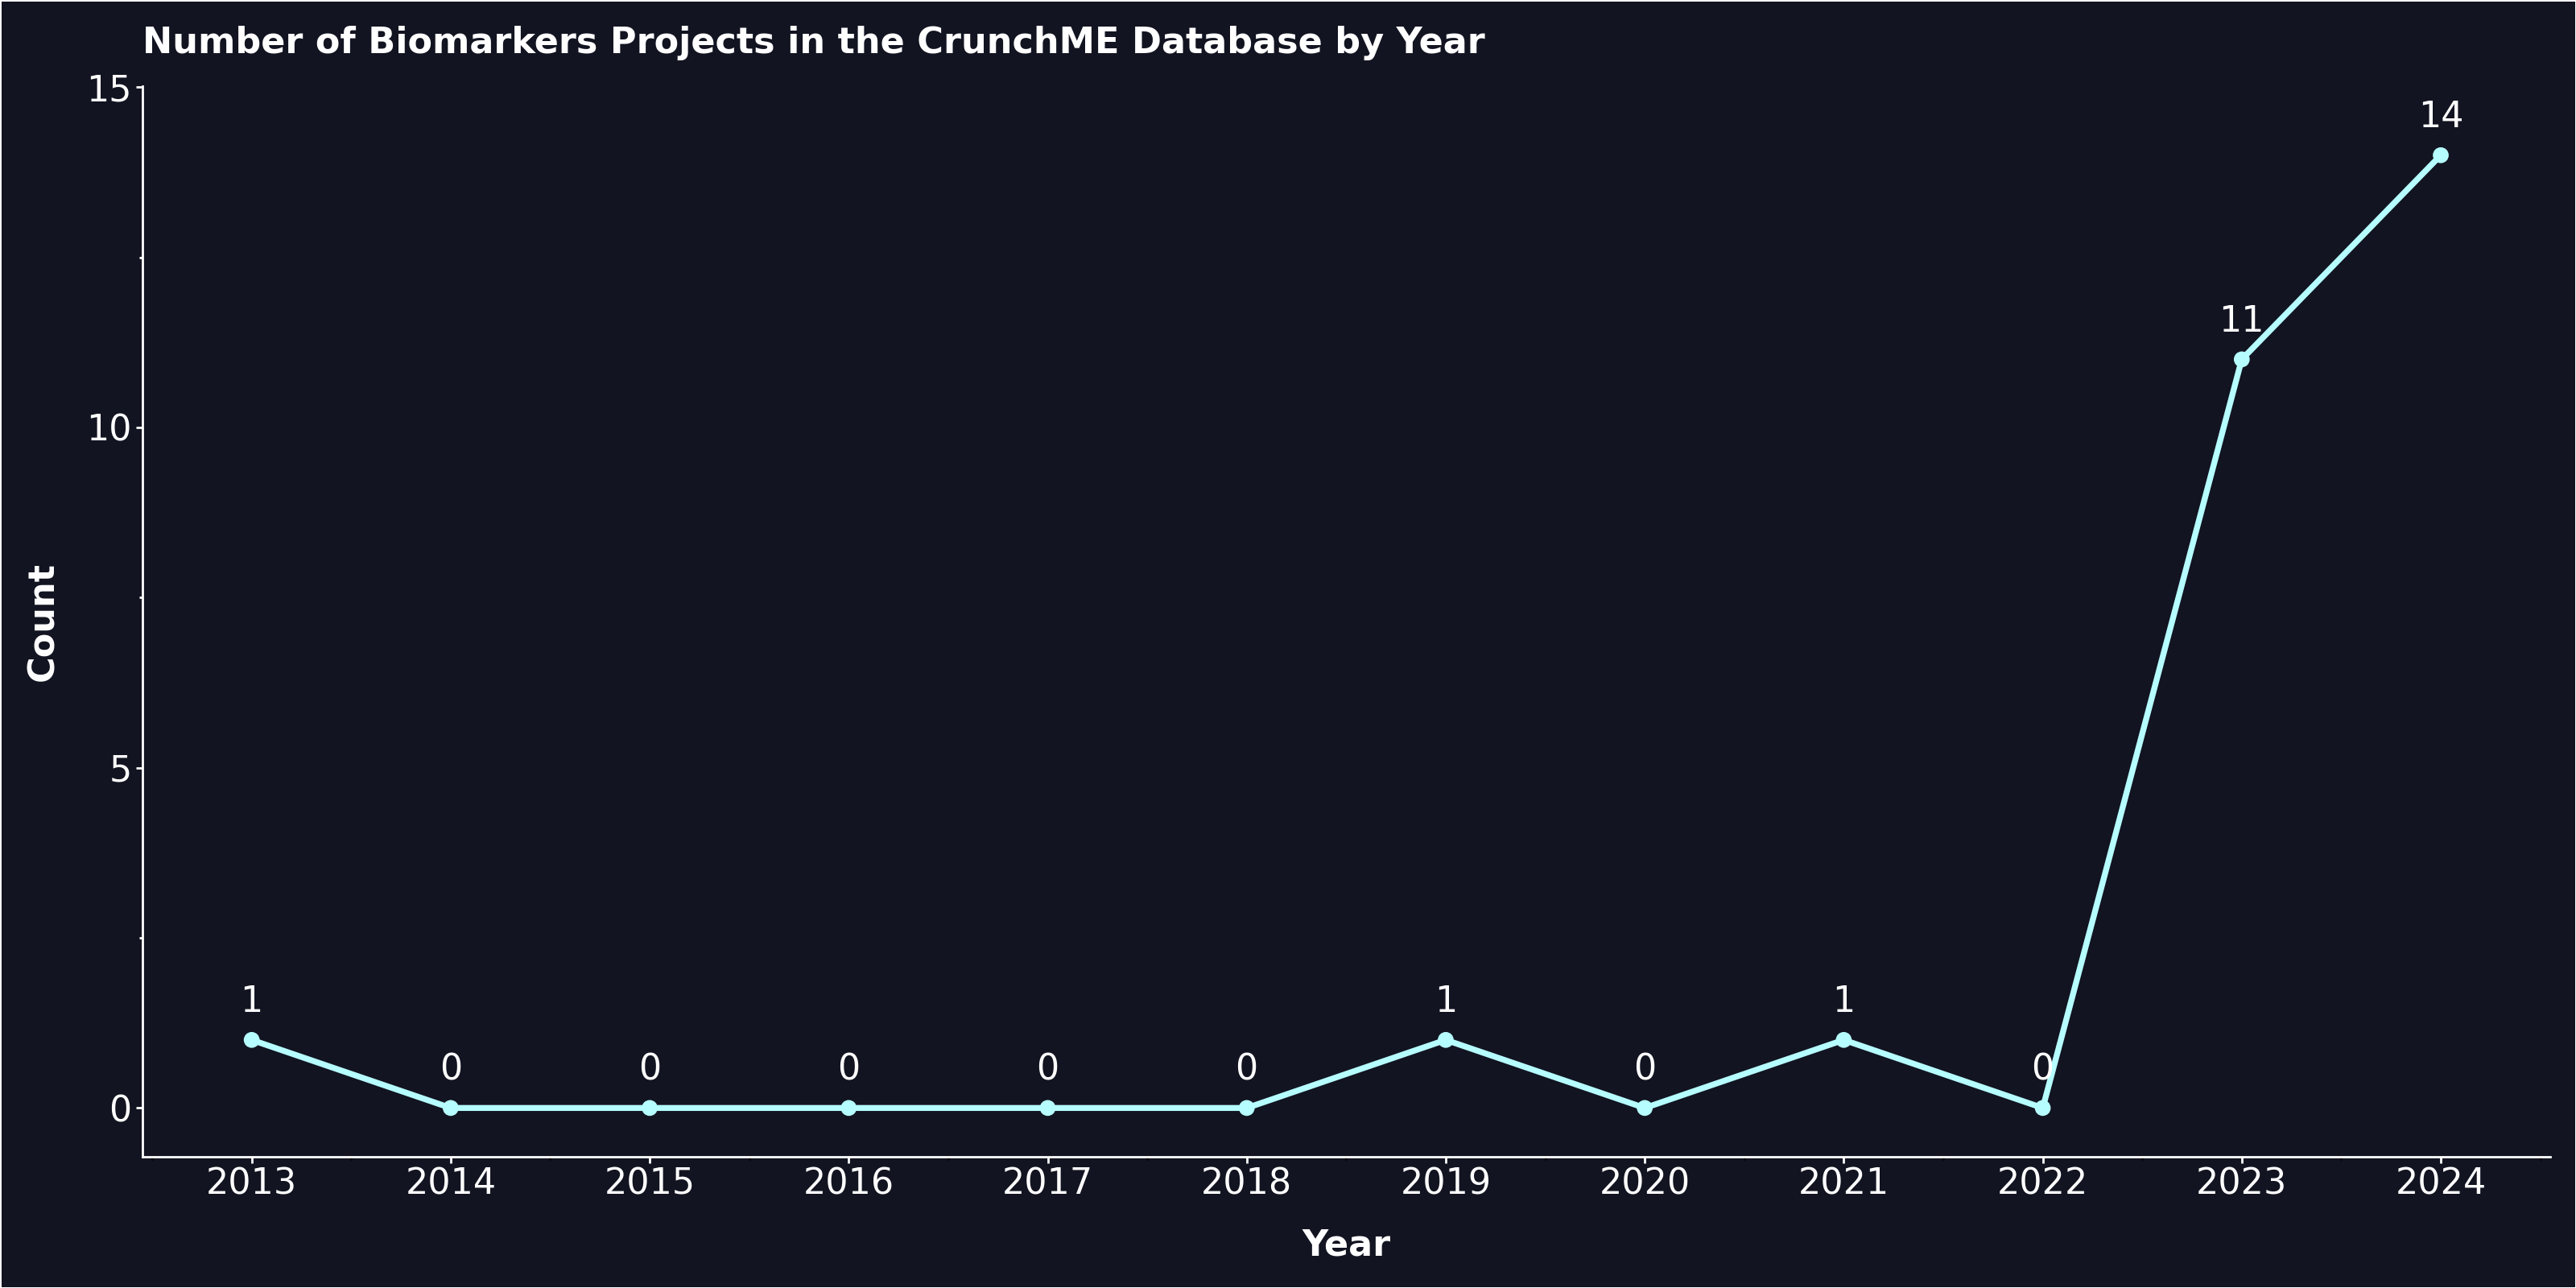

In [12]:
# Create the line chart
year_plot = (
    ggplot(df_plot_years, aes(x='Year', y='Count'))
    + geom_line(color='#B6FDFF', size=1.5)
    + geom_point(color='#B6FDFF', size=3)
    + geom_text(aes(label='Count'), va='bottom', size=16, color='white', nudge_y=0.3)
    + labs(title='Number of Biomarkers Projects in the CrunchME Database by Year', x='Year', y='Count')
    + theme_classic()
    + theme(
        figure_size=(16, 8),
        axis_title=element_text(size=16, weight='bold', color='white'),
        axis_text=element_text(size=16, color='white'),
        plot_title=element_text(size=16, weight='bold', color='white', hjust=0),
        legend_title=element_text(size=16, weight='bold', color='white'),
        legend_text=element_text(size=16, color='white'),
        plot_background=element_rect(fill='#121421', color=None),
        panel_background=element_rect(fill='#121421', color=None),
        legend_background=element_rect(fill='#121421', color=None),
        legend_key=element_rect(fill='#121421', color=None),
        axis_line=element_line(color='white', size=1),
        axis_ticks=element_line(color='white', size=1),
        legend_position='none'
    )
    + scale_x_continuous(
        breaks=list(full_years),
        labels=[str(year) for year in full_years]
    )
)

# Render plot
year_plot

##### 5.3 | Biomarker Projects by Year & Disease


In [13]:
# Drop rows where the year is NA
df_biomarkers = df_biomarkers.dropna(subset=['Year'])

# Explode the 'Disease' column
df_exploded = df_biomarkers.assign(Disease=df_biomarkers['Disease'].str.split(', ')).explode('Disease')

# Remove any rows where Disease is an empty string
df_exploded = df_exploded[df_exploded['Disease'] != '']

# Group by year and disease and count occurrences
disease_counts_by_year = df_exploded.groupby(['Year', 'Disease']).size().reset_index(name='Count')

# Find the minimum and maximum years
min_year = disease_counts_by_year['Year'].min()
max_year = disease_counts_by_year['Year'].max()

# Create a list of all years
all_years = list(range(int(min_year), int(max_year) + 1))

# Create a list of all unique diseases
all_diseases = disease_counts_by_year['Disease'].unique()

# Create an empty DataFrame to store the complete combinations
complete_df = pd.DataFrame(columns=['Year', 'Disease', 'Count'])

# Iterate through all year-disease combinations
for year in all_years:
    for disease in all_diseases:
        # Check if this combination exists in the original data
        subset = disease_counts_by_year[(disease_counts_by_year['Year'] == year) & (disease_counts_by_year['Disease'] == disease)]
        if not subset.empty:
            # If it exists, append the existing count
            complete_df = pd.concat([complete_df, subset], ignore_index=True)
        else:
            # If it does not exist, append a row with a count of 0
            new_row = pd.DataFrame({'Year': [year], 'Disease': [disease], 'Count': [0]})
            complete_df = pd.concat([complete_df, new_row], ignore_index=True)

# Display the complete DataFrame
complete_df.head(5)

<ipython-input-13-6924eaea8456>:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


,Year,Disease,Count
0,2013,Long Covid,1
1,2013,ME/CFS,1
2,2013,Fibromyalgia,0
3,2014,Long Covid,0
4,2014,ME/CFS,0


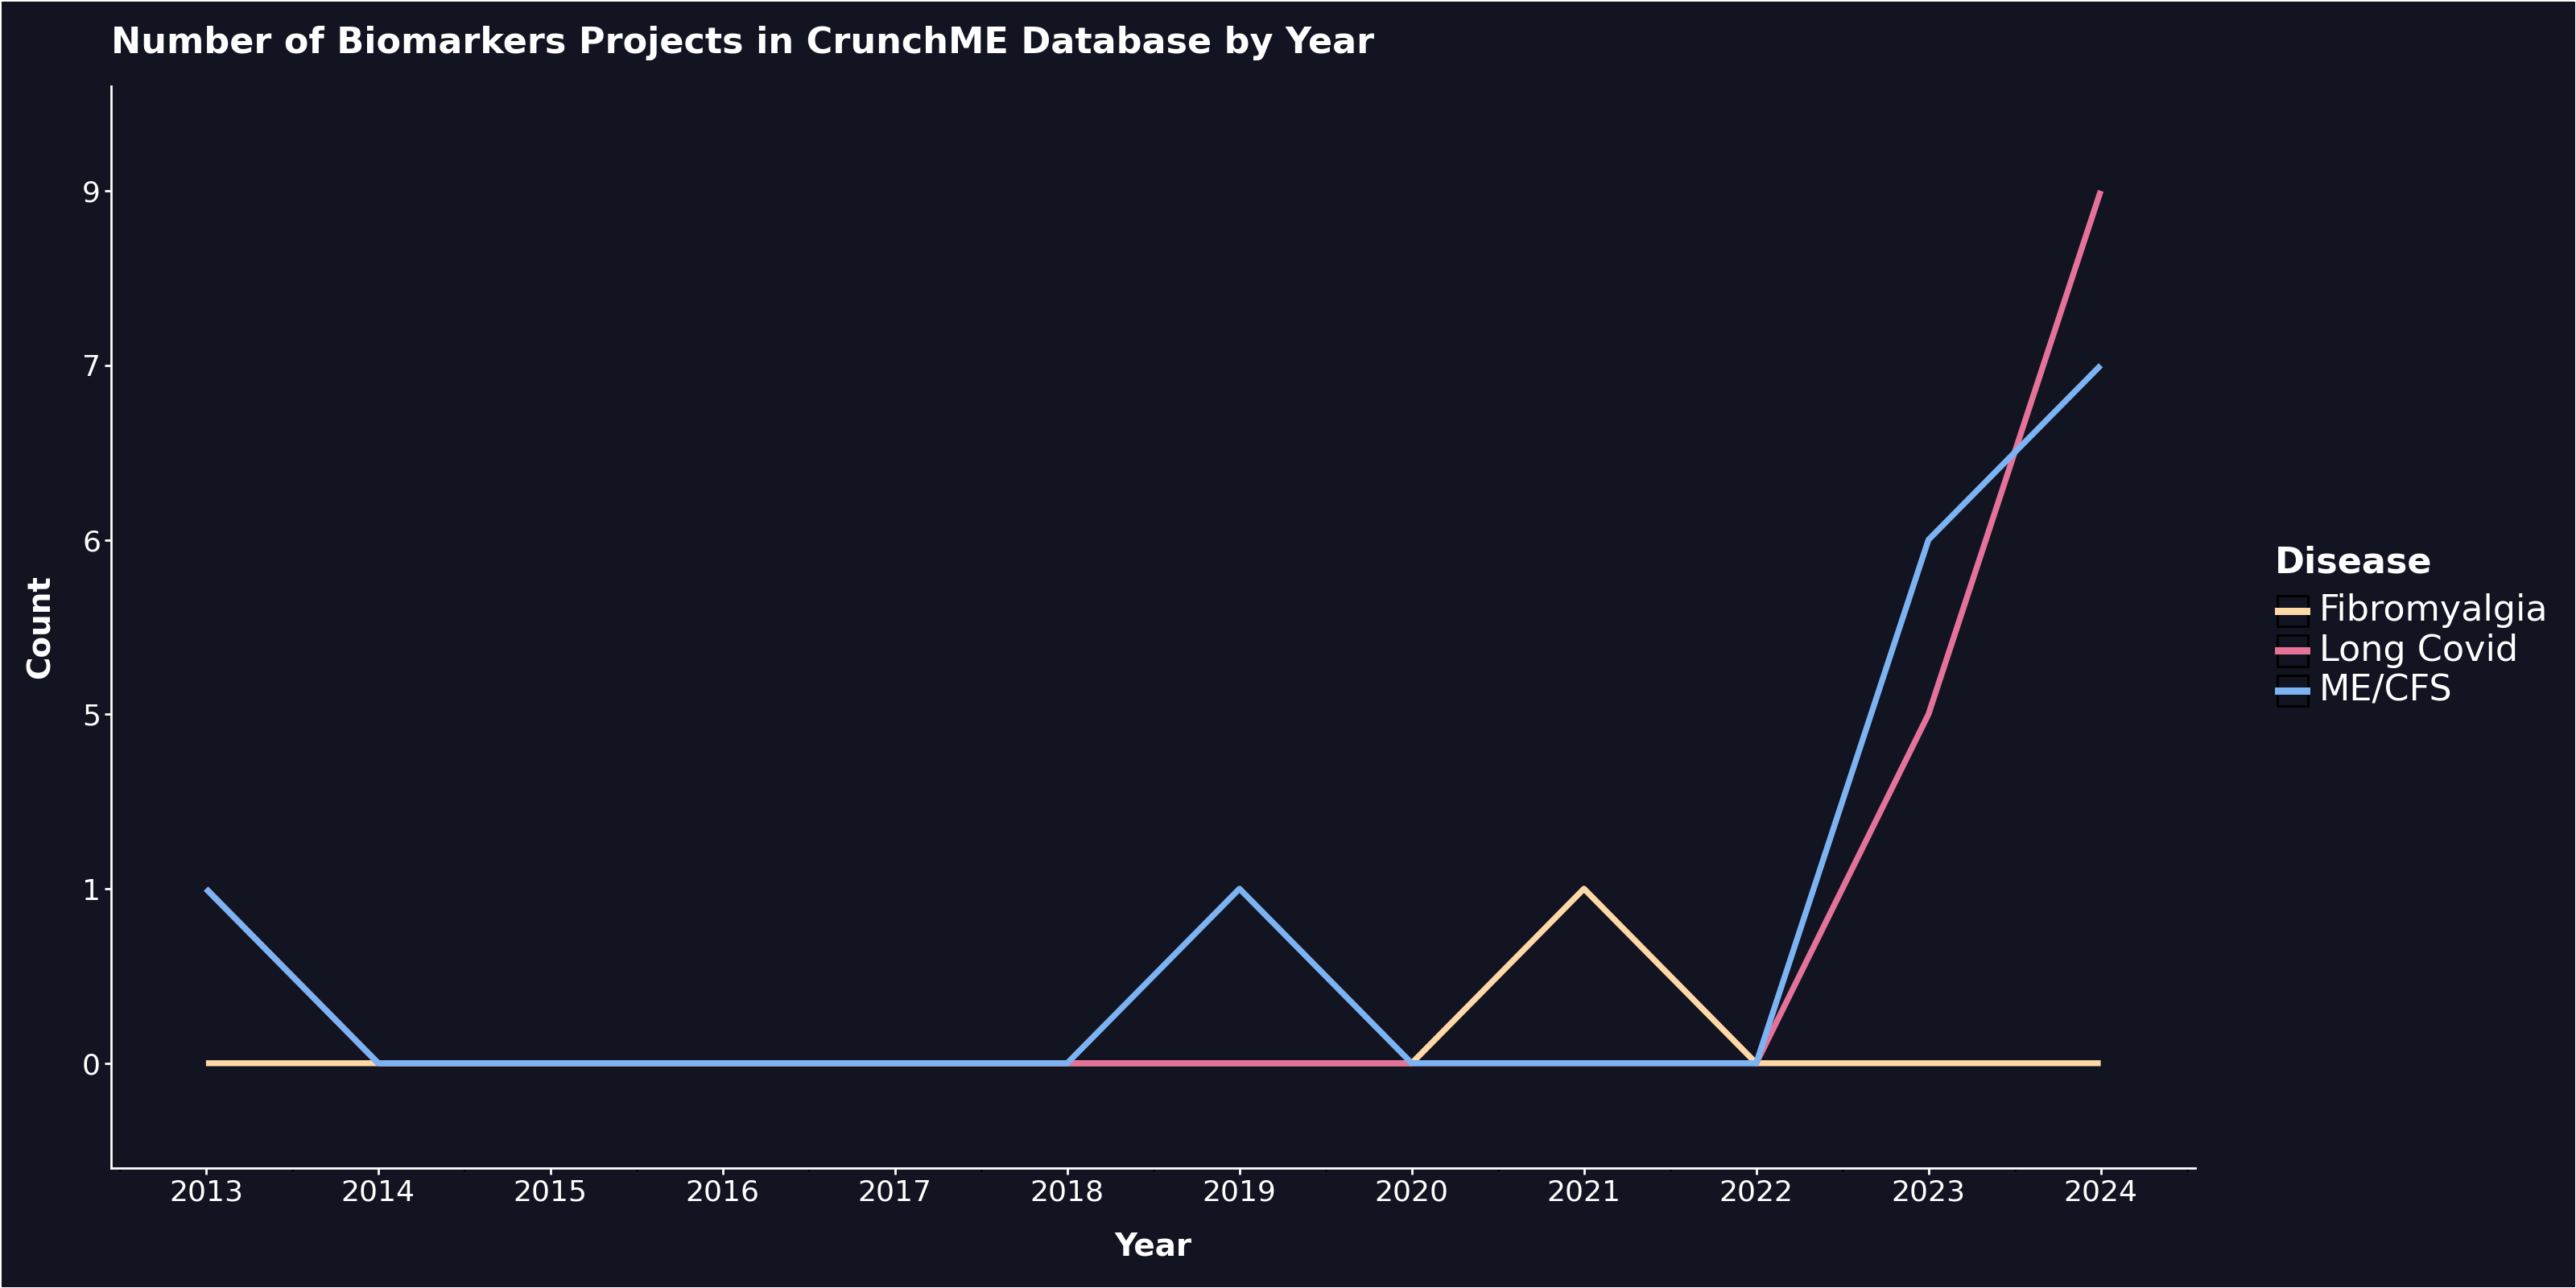

In [14]:
# Define custom colors for each disease
custom_colors = {
    "ME/CFS": "#7BB3F3",
    "Long Covid": "#E57399",
    "Fibromyalgia": "#FFD8A8"
}

# Create the line chart with custom colors
year_disease_plot = (
    ggplot(complete_df, aes(x='Year', y='Count', group='Disease', color='Disease'))
    + geom_line(size=1.5)
    + labs(
        title='Number of Biomarkers Projects in CrunchME Database by Year',
        x='Year',
        y='Count'
    )
    + theme_classic()
    + theme(
        figure_size=(16, 8),
        axis_title=element_text(size=14, weight='bold', color='white'),
        axis_text=element_text(size=13, color='white'),
        plot_title=element_text(size=16, weight='bold', color='white', hjust=0),
        legend_title=element_text(size=16, weight='bold', color='white'),
        legend_text=element_text(size=16, color='white'),
        plot_background=element_rect(fill='#121421', color=None),
        panel_background=element_rect(fill='#121421', color=None),
        legend_background=element_rect(fill='#121421', color=None),
        legend_key=element_rect(fill='#121421', color=None),
        axis_line=element_line(color='white', size=1),
        axis_ticks=element_line(color='white', size=1),
        legend_position='right'
    )
    + scale_color_manual(
        values=custom_colors
    )
    + scale_x_continuous(
        breaks=list(full_years),
        labels=[str(year) for year in full_years]
    )
)

# Render plot
year_disease_plot

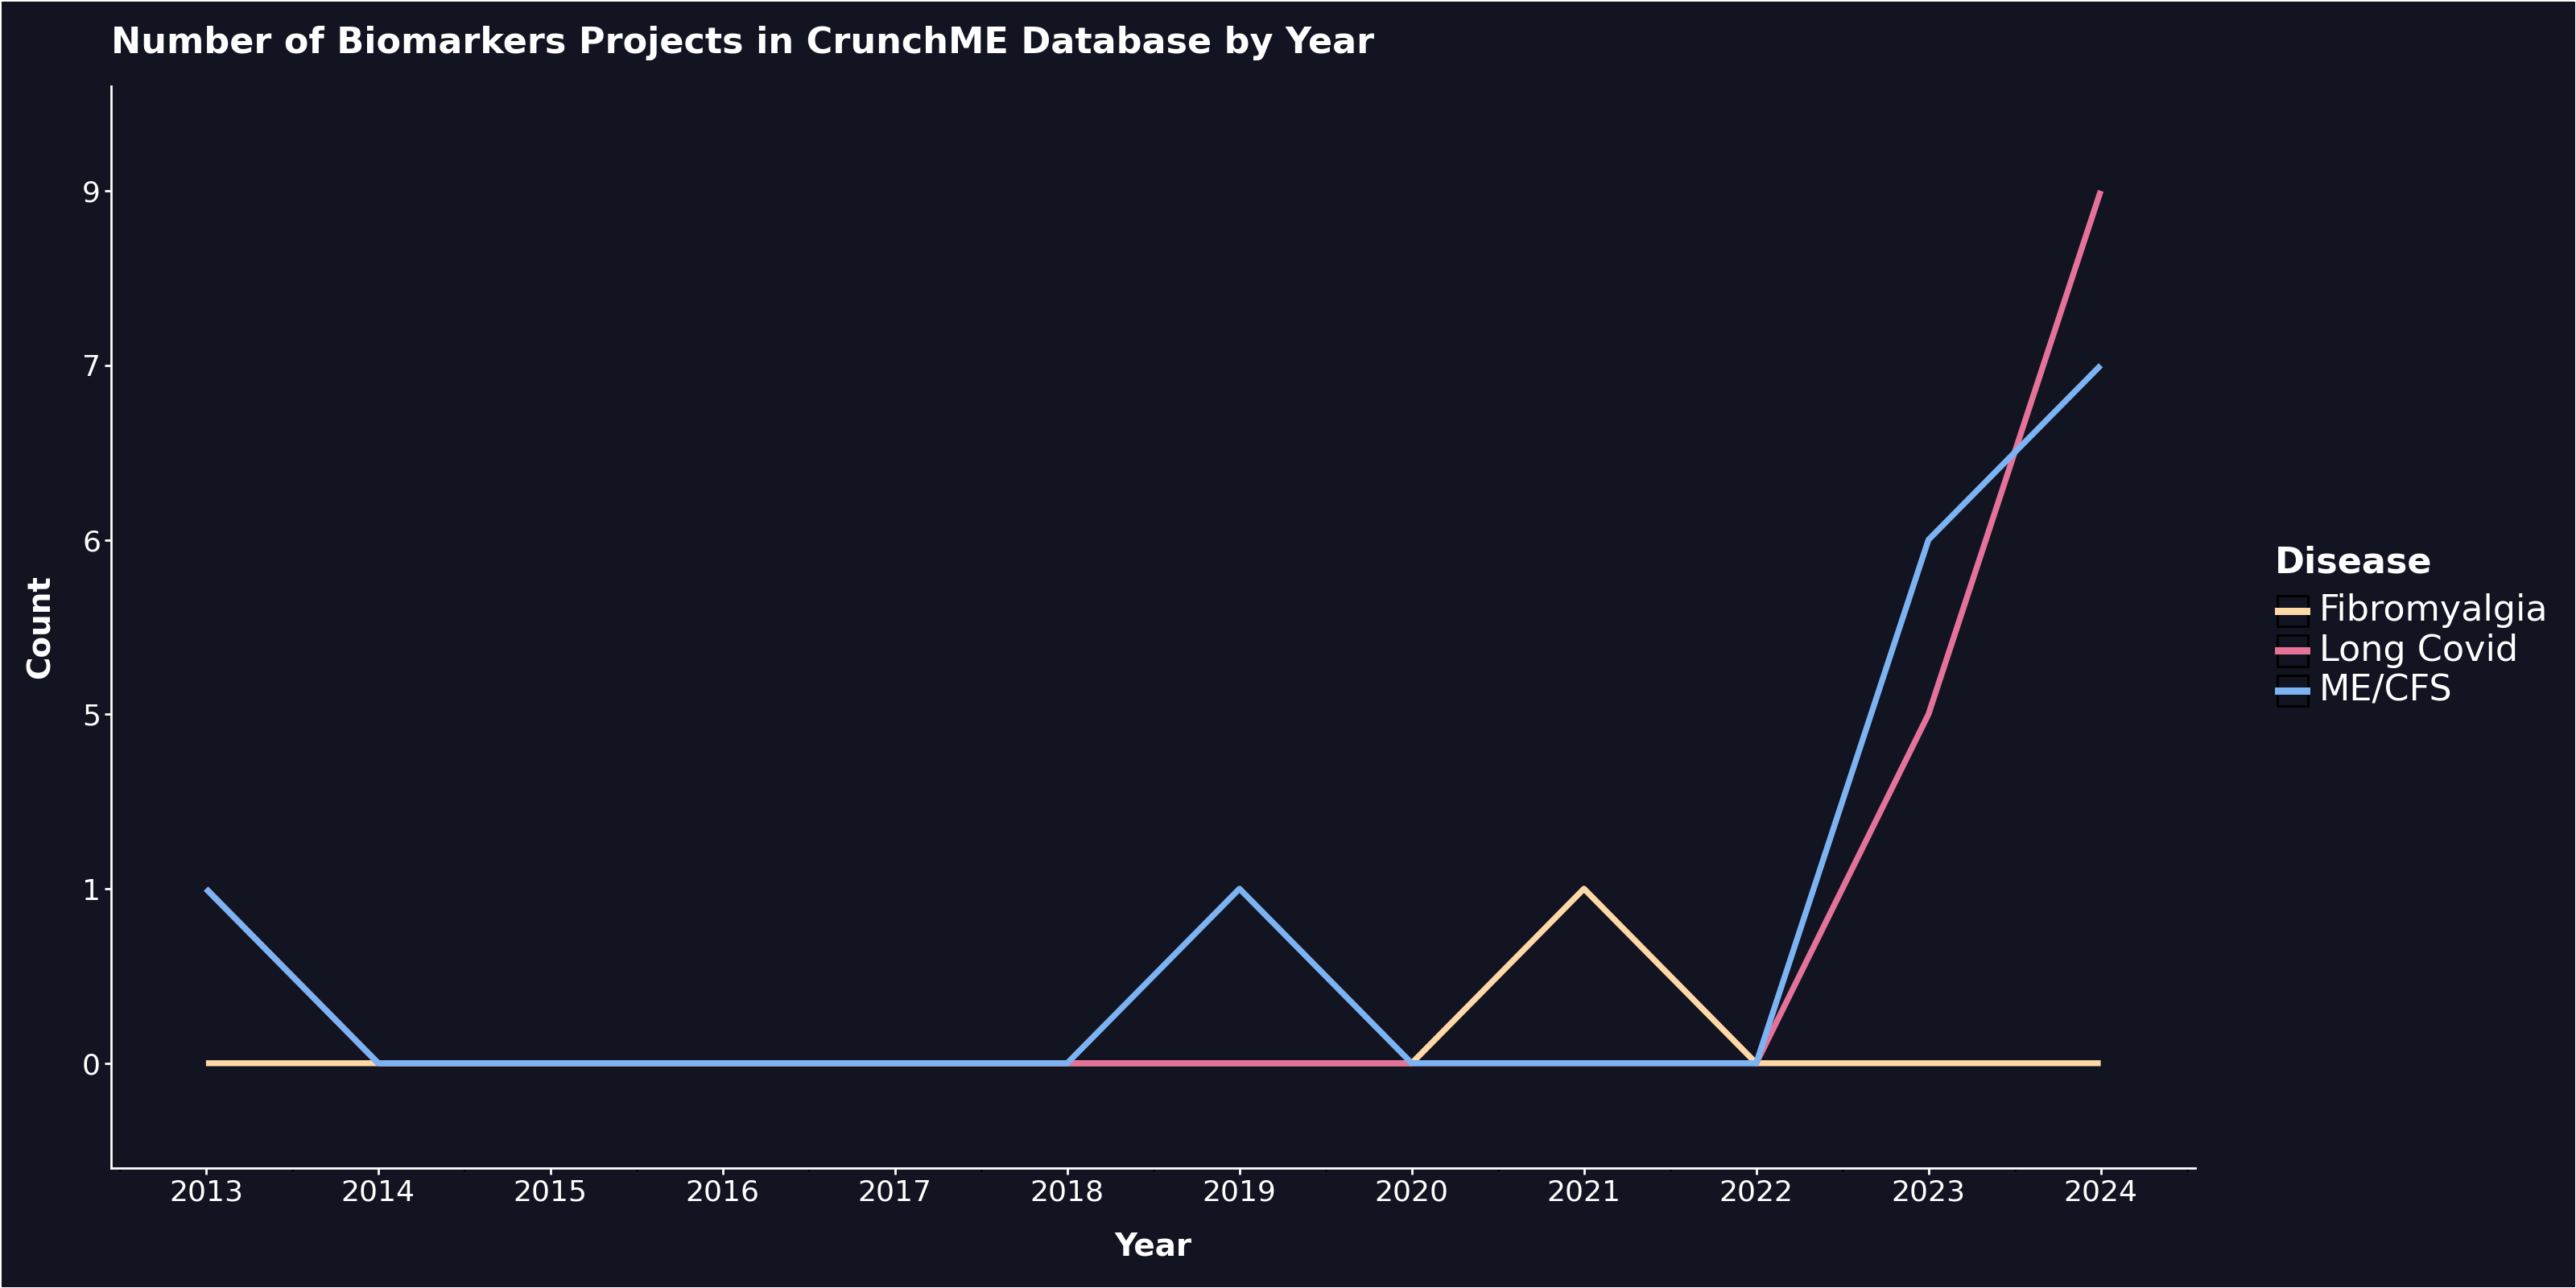

In [15]:
# Filter for Long Covid
long_covid_df = complete_df[complete_df['Disease'] == 'Long Covid']

# Filter for ME/CFS
me_cfs_df = complete_df[complete_df['Disease'] == 'ME/CFS']

# Filter for Fibromyalgia
fibromyalgia_df = complete_df[complete_df['Disease'] == 'Fibromyalgia']

# Create the line chart with custom colors
year_disease_plot = (
    ggplot(complete_df, aes(x='Year', y='Count', group='Disease', color='Disease'))
    + geom_line(size=1.5)
    + labs(
        title='Number of Biomarkers Projects in CrunchME Database by Year',
        x='Year',
        y='Count'
    )
    + theme_classic()
    + theme(
        figure_size=(16, 8),
        axis_title=element_text(size=14, weight='bold', color='white'),
        axis_text=element_text(size=13, color='white'),
        plot_title=element_text(size=16, weight='bold', color='white', hjust=0),
        legend_title=element_text(size=16, weight='bold', color='white'),
        legend_text=element_text(size=16, color='white'),
        plot_background=element_rect(fill='#121421', color=None),
        panel_background=element_rect(fill='#121421', color=None),
        legend_background=element_rect(fill='#121421', color=None),
        legend_key=element_rect(fill='#121421', color=None),
        axis_line=element_line(color='white', size=1),
        axis_ticks=element_line(color='white', size=1),
        legend_position='right'
    )
    + scale_color_manual(
        values=custom_colors
    )
    + scale_x_continuous(
        breaks=list(full_years),
        labels=[str(year) for year in full_years]
    )
)

# Render plot
year_disease_plot